In [2]:
#Loading the packages and functions.

import pandas as pd
from hw_demo_estimation import etl, graph_manipulation as gm, data_viz as dv
from tqdm import tqdm
import networkx as nx
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
import os
os.getcwd()

'C:\\Users\\katab'

In [4]:
#Loading and cleaning data, selecting relevant profiles only.

nodes, edges = etl.load_and_select_profiles_and_edges()

loading profiles
loading edges
1    2642113
2    1992414
Name: source, dtype: int64
Selected profiles: 695406
Nodes with edges: 434590


In [5]:
#Creating a graph.

G=  gm.create_graph_from_nodes_and_edges(nodes, edges)
nodes

,user_id,public,gender,region,AGE,TRAIN_TEST
0,1,1,1.0,"zilinsky kraj, zilina",26.0,TRAIN
4,4,1,0.0,"banskobystricky kraj, brezno",26.0,TRAIN
5,17,1,0.0,"zilinsky kraj, martin",27.0,TRAIN
6,5,1,1.0,"zilinsky kraj, zilina",26.0,TRAIN
7,18,1,1.0,"zilinsky kraj, kysucke nove mesto",18.0,TRAIN
...,...,...,...,...,...,...
1632778,1632779,1,NaN,"trenciansky kraj, myjava",NaN,TEST
1632781,1632782,1,NaN,"bratislavsky kraj, bratislava - nove mesto",NaN,TEST
1632782,1632783,1,1.0,"trenciansky kraj, povazska bystrica",37.0,TRAIN
1632784,1632785,1,1.0,"trenciansky kraj, povazska bystrica",37.0,TRAIN


In [6]:
#Splitting database to test and train database.

is_test =  nodes['TRAIN_TEST']=='TEST'
nodes_test = nodes[is_test]
is_train =  nodes['TRAIN_TEST']=='TRAIN'
nodes_train = nodes[is_train]

In [7]:
#Creating test and train graphs.

G_test = gm.create_graph_from_nodes_and_edges(nodes_test, edges)
G_train = gm.create_graph_from_nodes_and_edges(nodes_train, edges)

In [8]:
#We had to count the number of friends by gender for each node.
#We directly connected the counting-process with the prediction.
#We counted through iteration the neighbors of each node grouped by gender.
#If a node had more female neighbors than male, we predicted that its gender is female, otherwise male. 

In [9]:
pred_gend = []
for userid in tqdm(nodes_test.user_id):
    neighbors_it = set(G_train.neighbors(userid))
    genders = nodes_train[nodes_train.user_id.isin(neighbors_it)].dropna() \
        .groupby('gender').count()
    try:
        males = genders.loc[1, 'user_id']
    except:
        males = 0
    try:
        females = genders.loc[0, 'user_id']
    except:
        females = 0

    if males >= females:
        pred_gend.append(1)
    else:
        pred_gend.append(0)
    

prediction = pd.DataFrame(dict(user_id = nodes_test.user_id, gender = pred_gend))

100%|██████████| 40000/40000 [12:26<00:00, 53.60it/s] 


In [10]:
#Creating function to measure the accuracy with an accuracy score and a confusion matrix of any prediction
#which we can use any time to see the results at the same time.

def accuracy_check(test, pred):
    accuracyscore = accuracy_score(test, pred)
    confusionmatrix = confusion_matrix(test, pred)
    print(f"The confusion matrix is:\n{confusionmatrix}\n\nThe accuracy score is: {accuracyscore}")

In [11]:
#The test nodes gender values are NAs, that's why we cannot compare them with the results of our prediction.

In [12]:
y_test = nodes_test.gender.dropna()
y_prediction = prediction.gender
accuracy_check(y_test, y_prediction)

ValueError: Found input variables with inconsistent numbers of samples: [0, 40000]

# EXCERCISE 2 

In [41]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

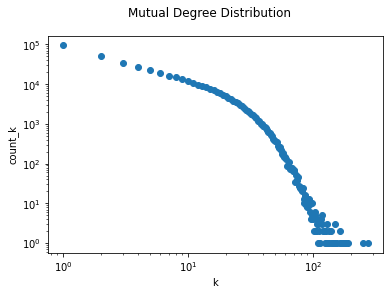

In [42]:
dv.plot_degree_distribution(G)

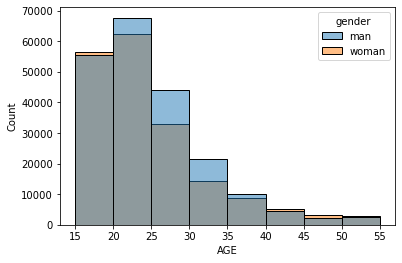

In [43]:
#Descriptive analytics of the nodes.
#Age distribution by gender.

dv.plot_age_distribution_by_gender(nodes)

In [44]:
#Above plot represents the distribution of people in the dataframe by age and gender.
#It can be observed that the grand majority of people are between the age of 15 and 30.
#People above 30 and especially 35 years are less represented in the dataframe.
#This means that younger generations are more likely to use observed social media platform.
#It is visible that there are more male users than females between the age of 20 and 40 .
#However between the age of 15-20 and 40-50 there are more female users than males.

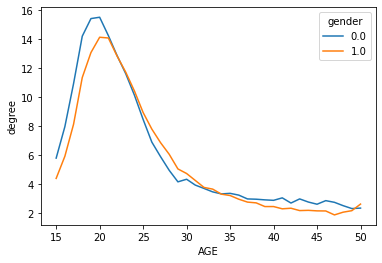

In [45]:
dv.plot_node_degree_by_gender(nodes, G)

In [46]:
#Above plot represents the degree of different age groups by gender.
#It can be observed that women have more contacts in the platform than men in the age group of 15-22 and older than 33.
#However between 24 and 33 men have more social media contacts than women.
#The number of contacts is high in case of teenagers and young adults, especially between 17 and 23.
#It is visible that the number of contacts are decreasing significantly.
#It can be observed that after the age of 35 there is no significant change in the number of contacts over time.

In [47]:
#Neighbor connectivity, triadic closure (local clustering coefficient).
#Plotting: adding the attributes to the nodes dataframe.

In [48]:
#Adding 2 more attributes to the nodes dataframe.

nodes = nodes.assign(connectivity = nodes.user_id.map(nx.average_neighbor_degree(G)))
nodes = nodes.assign(tri_closure = nodes.user_id.map(nx.clustering(G)))
nodes

,user_id,public,gender,region,AGE,TRAIN_TEST,connectivity,tri_closure
0,1,1,1.0,"zilinsky kraj, zilina",26.0,TRAIN,13.500000,0.000000
4,4,1,0.0,"banskobystricky kraj, brezno",26.0,TRAIN,6.000000,0.000000
5,17,1,0.0,"zilinsky kraj, martin",27.0,TRAIN,11.000000,0.166667
6,5,1,1.0,"zilinsky kraj, zilina",26.0,TRAIN,12.285714,0.190476
7,18,1,1.0,"zilinsky kraj, kysucke nove mesto",18.0,TRAIN,24.230769,0.192308
...,...,...,...,...,...,...,...,...
1632778,1632779,1,NaN,"trenciansky kraj, myjava",NaN,TEST,1.000000,0.000000
1632781,1632782,1,NaN,"bratislavsky kraj, bratislava - nove mesto",NaN,TEST,2.000000,0.000000
1632782,1632783,1,1.0,"trenciansky kraj, povazska bystrica",37.0,TRAIN,1.000000,0.000000
1632784,1632785,1,1.0,"trenciansky kraj, povazska bystrica",37.0,TRAIN,1.000000,0.000000


In [49]:
#Plotting: adding attributes as a new parameter to the function.

In [50]:
def plot_node_stats_by_gender(nodes, G, stats):
    """Plot the average of node degree across age and gender"""

    

    
    nodes_w_degree = nodes.set_index("user_id").merge(
        pd.Series(dict(G.degree)).to_frame(),
        how="left",
        left_index=True,
        right_index=True,
    )
    nodes_w_degree = nodes_w_degree.rename({0: "degree"}, axis=1)
    plot_df = (
        nodes_w_degree.groupby(["AGE", "gender"]).agg({"degree": "mean"}).reset_index()
    )
    
    
    if stats == "degree":
        sns.lineplot(data=plot_df, x="AGE", y="degree", hue="gender")
    elif stats == "connectivity":
        sns.lineplot(data=nodes, x="AGE", y="connectivity", hue="gender")
    else:
        sns.lineplot(data=nodes, x="AGE", y="tri_closure", hue="gender")

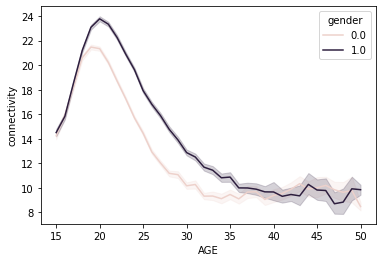

In [51]:
plot_node_stats_by_gender(nodes, G, 'connectivity')

In [52]:
#Above plot represents how many contacts a given user's neighbor has.
#It can be seen that men are more connected as their neighbors have far more contacts
#than female users of this social media platform.
#It can be observed that over time, especially after 30-35 years of age, this connectivity is significantly decreased.

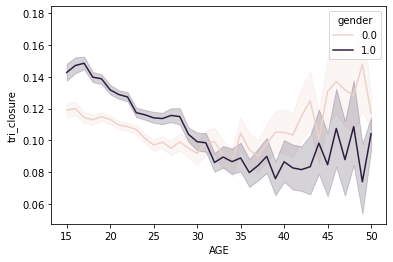

In [53]:
plot_node_stats_by_gender(nodes, G, 'tri_closure')

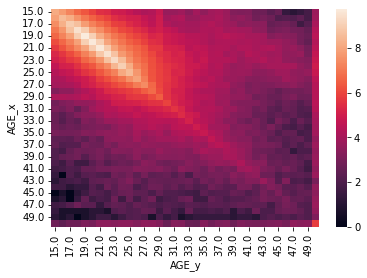

In [54]:
edges_w_features = gm.add_node_features_to_edges(nodes, edges)
dv.plot_age_relations_heatmap(edges_w_features)

In [55]:
#Modifying the underlying function to separate genders (without logging and normalizing).

In [56]:
def plot_age_relations_heatmap_methods(edges_w_features, method):
    """Plot a heatmap that represents the distribution of edges"""
    plot_df = edges_w_features.groupby(["gender_x", "gender_y", "AGE_x", "AGE_y"]).agg(
        {"smaller_id": "count"}
    )
    plot_df_w_w = plot_df.loc[(0, 0)].reset_index()
    plot_df_heatmap = plot_df_w_w.pivot_table(
        index="AGE_x", columns="AGE_y", values="smaller_id"
    ).fillna(0)
    plot_df_heatmap_logged = np.log(plot_df_heatmap + 1)
    plot_df_heatmap_normed = np.linalg.norm(plot_df_heatmap + 1, ord='fro')
    
    if method == "log":
        sns.heatmap(plot_df_heatmap_logged)
    elif method == "norm":
        sns.heatmap(plot_df_heatmap_normed)
    else:
        sns.heatmap(plot_df_heatmap)

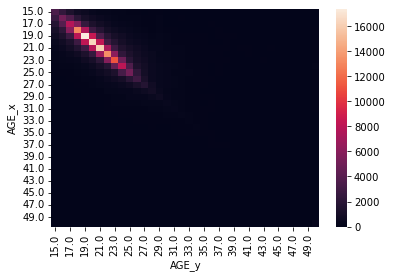

In [57]:
#Logged, normed and no-logging heatmap.

#Basic:

plot_age_relations_heatmap_methods(edges_w_features, "basic")

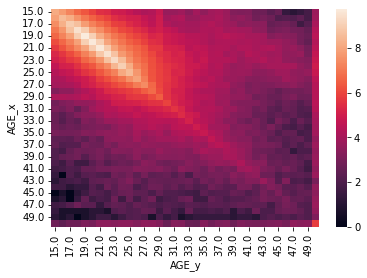

In [58]:
#Logged:

plot_age_relations_heatmap_methods(edges_w_features, "log")

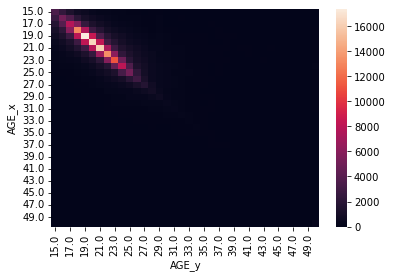

In [59]:
#Normed:

plot_age_relations_heatmap_methods(edges_w_features, "normed")

In [60]:
#Male-Male version

def plot_age_relations_heatmap_methods_MM(edges_w_features, method):
    """Plot a heatmap that represents the distribution of edges"""
    plot_df = edges_w_features.groupby(["gender_y", "gender_y", "AGE_x", "AGE_y"]).agg(
        {"smaller_id": "count"}
    )
    plot_df_w_w = plot_df.loc[(0, 0)].reset_index()
    plot_df_heatmap = plot_df_w_w.pivot_table(
        index="AGE_x", columns="AGE_y", values="smaller_id"
    ).fillna(0)
    plot_df_heatmap_logged = np.log(plot_df_heatmap + 1)
    plot_df_heatmap_normed = np.linalg.norm(plot_df_heatmap + 1, ord='fro')
    
    if method == "log":
        sns.heatmap(plot_df_heatmap_logged)
    elif method == "norm":
        sns.heatmap(plot_df_heatmap_normed)
    else:
        sns.heatmap(plot_df_heatmap)

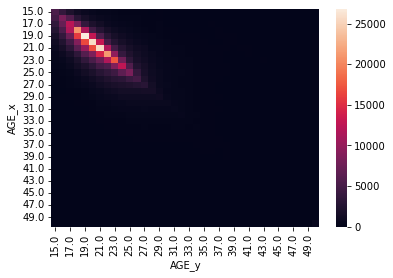

In [61]:
plot_age_relations_heatmap_methods_MM(edges_w_features, "basic")

In [62]:
#Above plot represents how strong the connection is between two men on this social media platform.
#It can be seen on the heatmap that between 17 and 23 men are more likely to have contacts from other age groups.
#However it is visible that men mostly have contacts with other men of the same age.

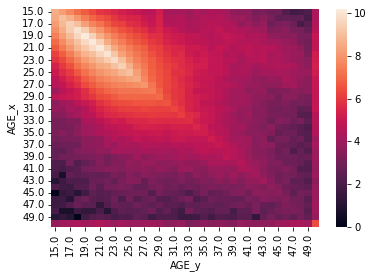

In [63]:
#Log version of Male-Male

plot_age_relations_heatmap_methods_MM(edges_w_features, "log")

In [64]:
#Female-Female version

def plot_age_relations_heatmap_methods_FF(edges_w_features, method):
    """Plot a heatmap that represents the distribution of edges"""
    plot_df = edges_w_features.groupby(["gender_x", "gender_x", "AGE_x", "AGE_y"]).agg(
        {"smaller_id": "count"}
    )
    plot_df_w_w = plot_df.loc[(0, 0)].reset_index()
    plot_df_heatmap = plot_df_w_w.pivot_table(
        index="AGE_x", columns="AGE_y", values="smaller_id"
    ).fillna(0)
    plot_df_heatmap_logged = np.log(plot_df_heatmap + 1)
    plot_df_heatmap_normed = np.linalg.norm(plot_df_heatmap + 1, ord='fro')
    
    if method == "log":
        sns.heatmap(plot_df_heatmap_logged)
    elif method == "norm":
        sns.heatmap(plot_df_heatmap_normed)
    else:
        sns.heatmap(plot_df_heatmap)

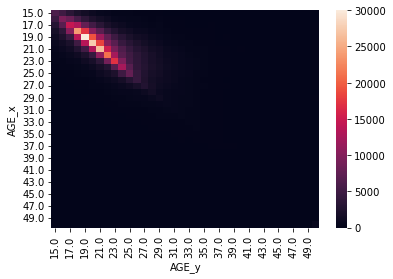

In [65]:
plot_age_relations_heatmap_methods_FF(edges_w_features, "basic")

In [66]:
#Above plot represents how strong the connection is between two women on this social media platform.
#It can be observed on the heatmap that between 17 and 23 women are more likely to have contacts from other age groups.
#However it is visible that women mostly have contacts with other women of the same age.
#It can be seen on the color scale that women have more contacts with women than men have with other men.

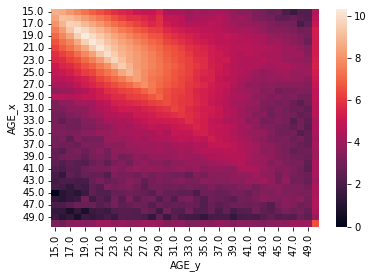

In [67]:
#Log version of Female-Female

plot_age_relations_heatmap_methods_FF(edges_w_features, "log")